In [ ]:
#The goal of this walkthrough is to see how PhasePlot can be a useful tool for understanding data

In [1]:
import sys
import numpy as np
import yt


In [26]:
#I found that if I try to add a new variable I have to rerun the whole notebook.
def metfrac(field,data):
    return data['Metal_Density']/data['density'] 
def znew(field,data):
    return data['z'] - ds.quan(0.53,'code_length')
def absznew(field,data):
    return np.abs(data['z'] - ds.quan(0.53,'code_length'))

In [27]:
#Load our data:
ds = yt.load("DD0044/DD0044")

yt : [INFO     ] 2020-03-18 20:56:22,599 Parameters: current_time              = 0.044000089990001
yt : [INFO     ] 2020-03-18 20:56:22,601 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2020-03-18 20:56:22,603 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2020-03-18 20:56:22,607 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2020-03-18 20:56:22,612 Parameters: cosmological_simulation   = 0.0


In [58]:
#If we want to understand what variables are in our data we can look here:
#for field in ds.fields.gas:
#    print(field)

In [32]:
#Now that I have loaded my data I need to add those variables as new fields
ds.add_field(('gas','metf'),function=metfrac)
ds.add_field(('gas','zdisk'),function=znew,units='code_length')
ds.add_field(('gas','abszdisk'),function=absznew,units='code_length')

yt : [WARNING  ] 2020-03-18 20:57:34,086 Field ('gas', 'metf') already exists. To override use force_override=True.
/Users/stonnesen/Desktop/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  """Entry point for launching an IPython kernel.
yt : [WARNING  ] 2020-03-18 20:57:34,092 Field ('gas', 'zdisk') already exists. To override use force_override=True.
/Users/stonnesen/Desktop/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  
yt : [WARNING  ] 2020-03-18 20:57:34,097 Field ('gas', 'abszdisk') already exists. To override use force_override=True.
/Users/stonnesen/Desktop/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  This is separate from the ipykernel package so we can avoid d

yt : [INFO     ] 2020-03-17 15:12:30,450 Projection completed
yt : [INFO     ] 2020-03-17 15:12:30,461 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-17 15:12:30,462 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-17 15:12:30,463 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-17 15:12:30,465 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-17 15:12:30,473 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



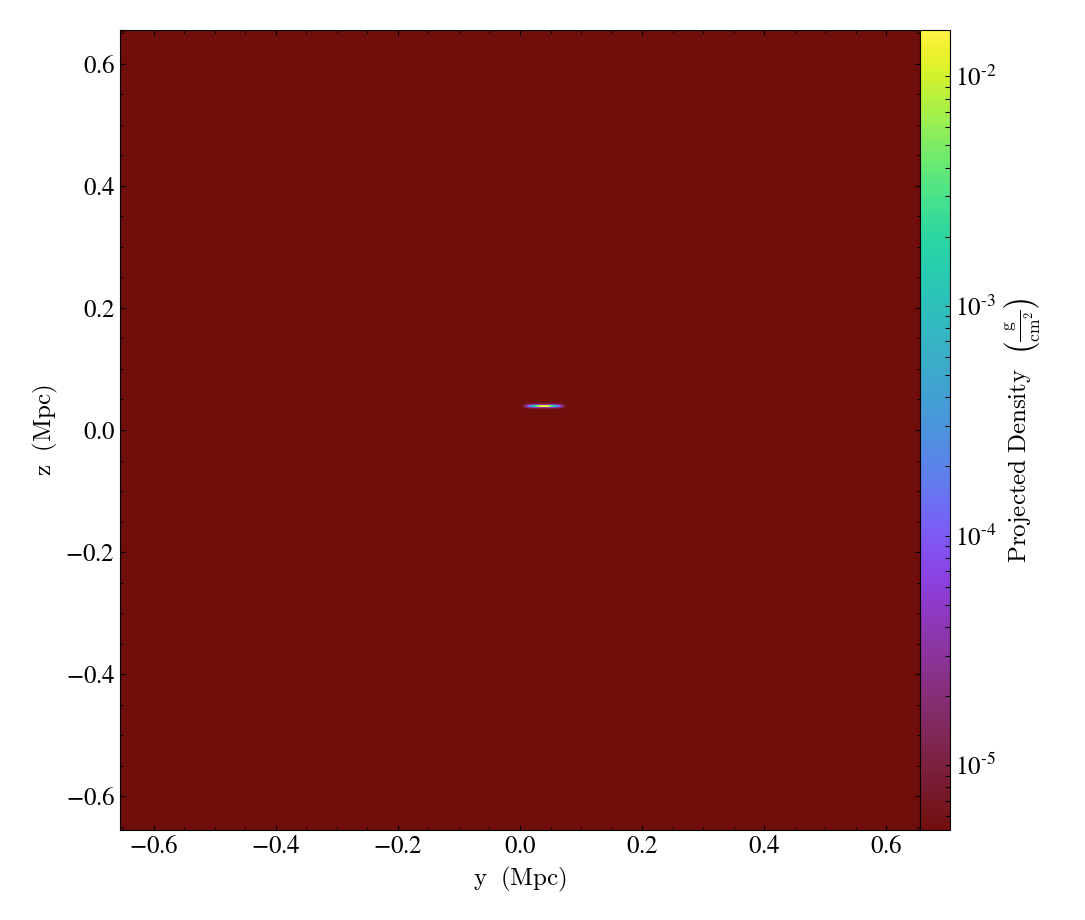

In [6]:
#Let's just take a look:
yt.ProjectionPlot(ds,"x","density")

In [34]:
#So things that I think about have to do with what gas is doing in the disk
#If we are going to focus on the disk let's select that region:
disku = ds.disk([0.53,0.53,0.53],[0,0,1.0],(50,"kpc"),(5,"kpc"))
#regu = ds.box([0.4,0.4,0.24],[0.6,0.6,0.26])

yt : [INFO     ] 2020-03-18 20:58:11,778 xlim = 0.491853 0.568147
yt : [INFO     ] 2020-03-18 20:58:11,780 ylim = 0.491853 0.568147
yt : [INFO     ] 2020-03-18 20:58:11,782 xlim = 0.491853 0.568147
yt : [INFO     ] 2020-03-18 20:58:11,788 ylim = 0.491853 0.568147
yt : [INFO     ] 2020-03-18 20:58:11,795 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



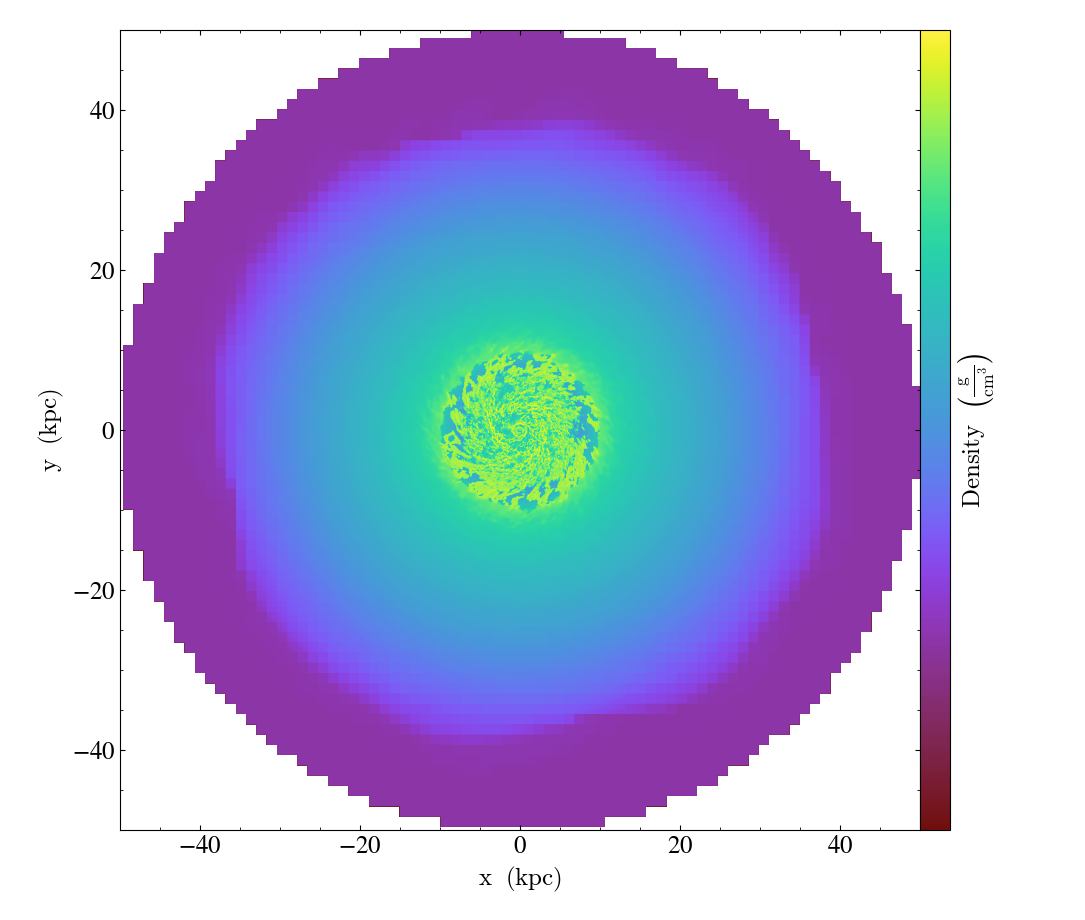

In [35]:
#Now we can take another look:
yt.SlicePlot(ds,"z","density",data_source=disku,center=(0.53,0.53,0.53),width=(100,'kpc'))

yt : [INFO     ] 2020-03-18 20:58:21,862 Projection completed
yt : [INFO     ] 2020-03-18 20:58:21,863 xlim = 0.495668 0.564332
yt : [INFO     ] 2020-03-18 20:58:21,864 ylim = 0.495668 0.564332
yt : [INFO     ] 2020-03-18 20:58:21,866 xlim = 0.495668 0.564332
yt : [INFO     ] 2020-03-18 20:58:21,868 ylim = 0.495668 0.564332
yt : [INFO     ] 2020-03-18 20:58:21,872 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



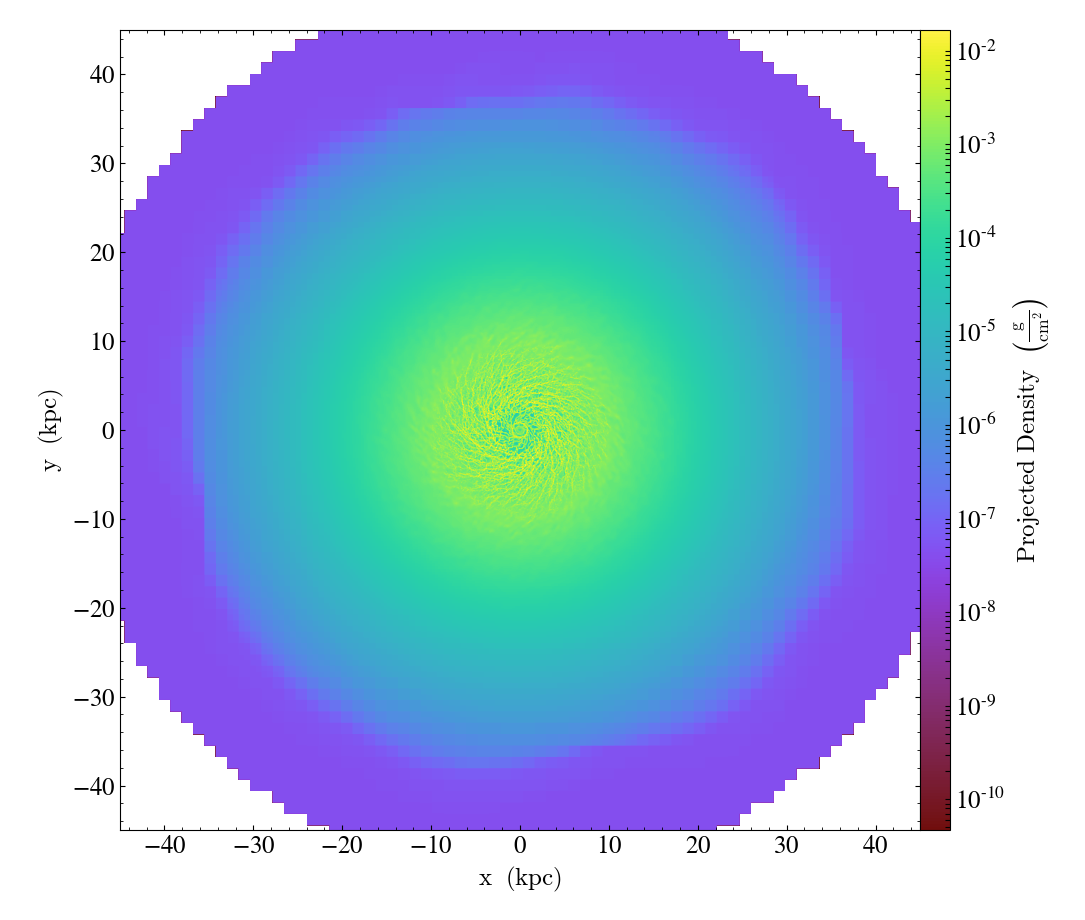

In [36]:
#And here is a look at all the data we selected:
yt.ProjectionPlot(ds,"z","density",data_source=disku,center=[0.53,0.53,0.53],width=(90,"kpc"))


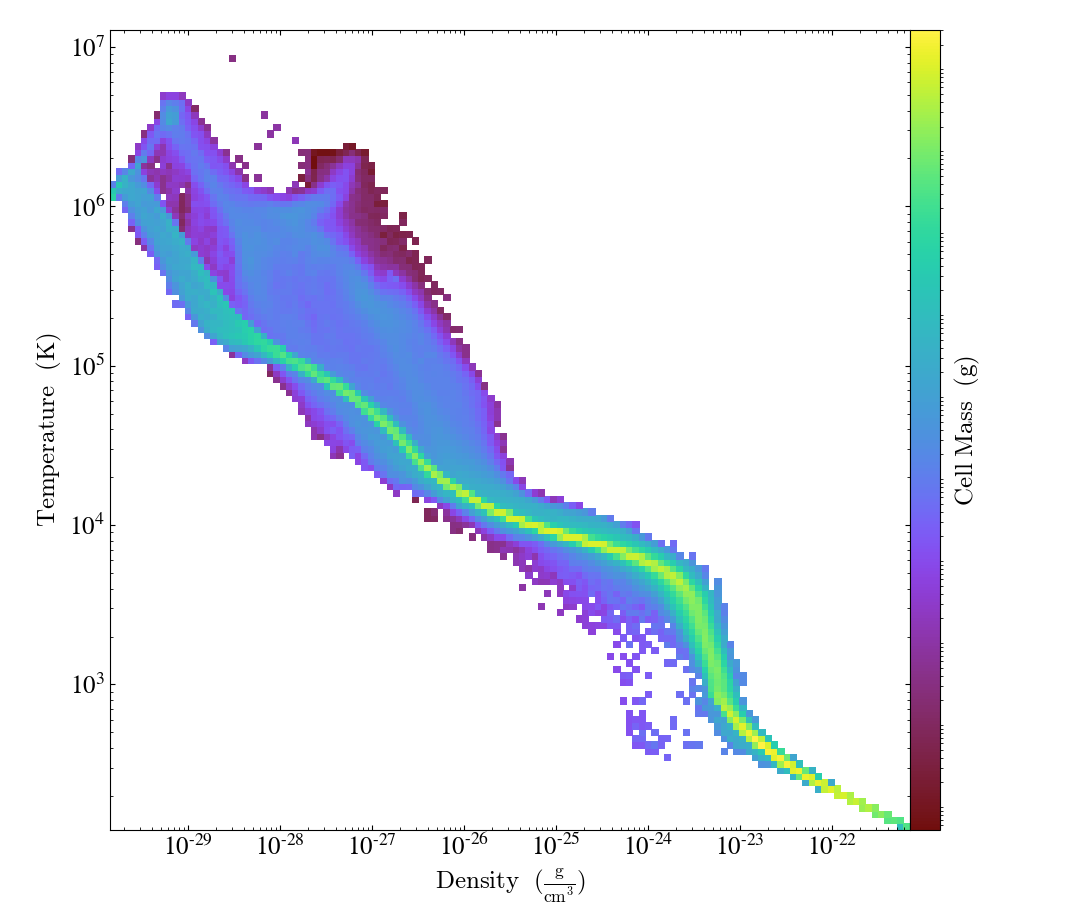

In [37]:
#Okay, so what kind of gas is in this disk?  Let's take a look at the rho-T distribution:
yt.PhasePlot(disku,"density","temperature",["cell_mass"],weight_field=None)
#yt.PhasePlot(ds,"density","temperature",["cell_mass"],weight_field=None)
#note, unlike with ProjectionPlot, I can't use "ds".  Need to use a selected region.  Why?


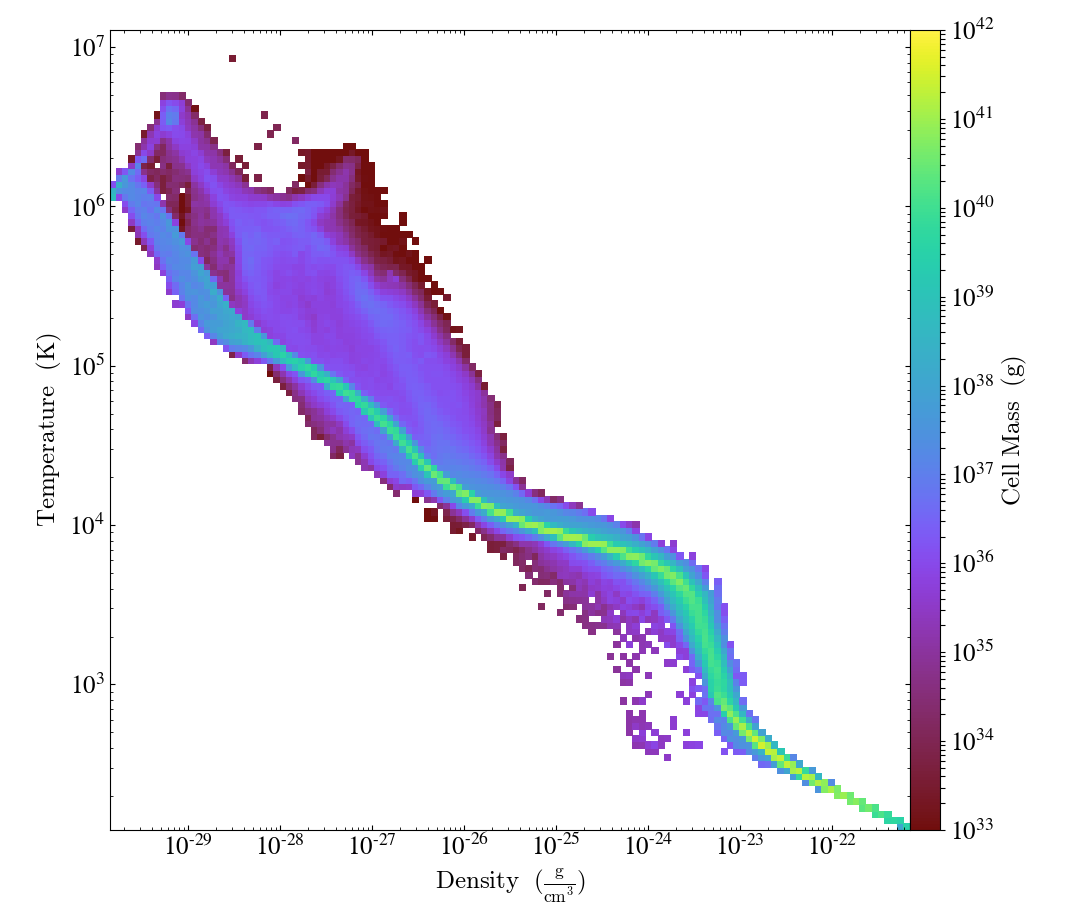

In [38]:
#Ugh!  Why is this not labeling the cell mass range?!  
#Turns out if the range is too high Phaseplot is against labels...
#Maybe I can force it...

plot = yt.PhasePlot(disku,"density","temperature",["cell_mass"],weight_field=None)
plot.set_zlim("cell_mass",1e33,1e42)


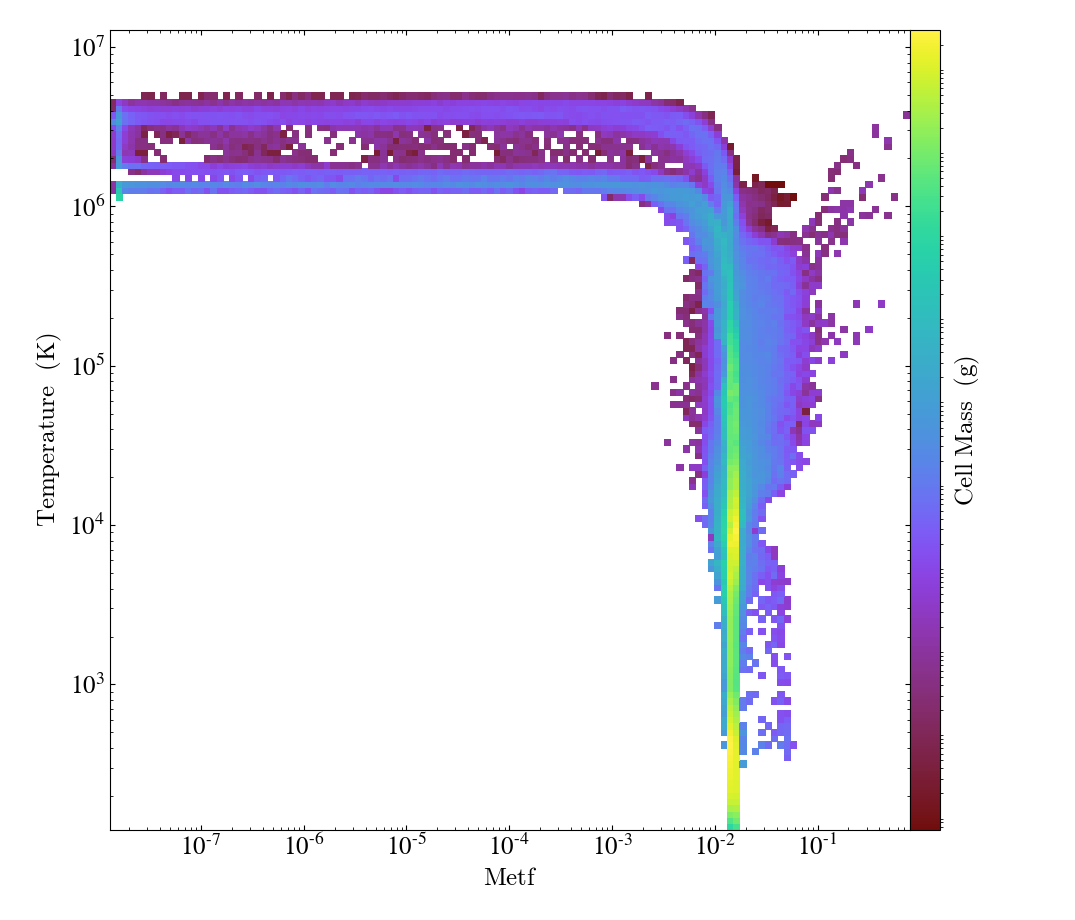

In [39]:
#I think I am including a lot of gas that is not in the disk.  Can I get rid of it?
yt.PhasePlot(disku,"metf","temperature",["cell_mass"],weight_field=None)


In [ ]:
#What should we use to get rid of gas outside the disk?

In [40]:
#If I wanted I could take a look at a slice to really see what I am removing
#yt.SlicePlot(ds,"z","metf",data_source=disku,center=(0.53,0.53,0.53),width=(70,'kpc'))
#plt.set_zlim("metallicity",0.01,0.011)

In [41]:
#So I can pretty safely get rid of all gas with metf > 2e-3
diskchoose = disku.cut_region(["obj['metf'] > 0.002"])


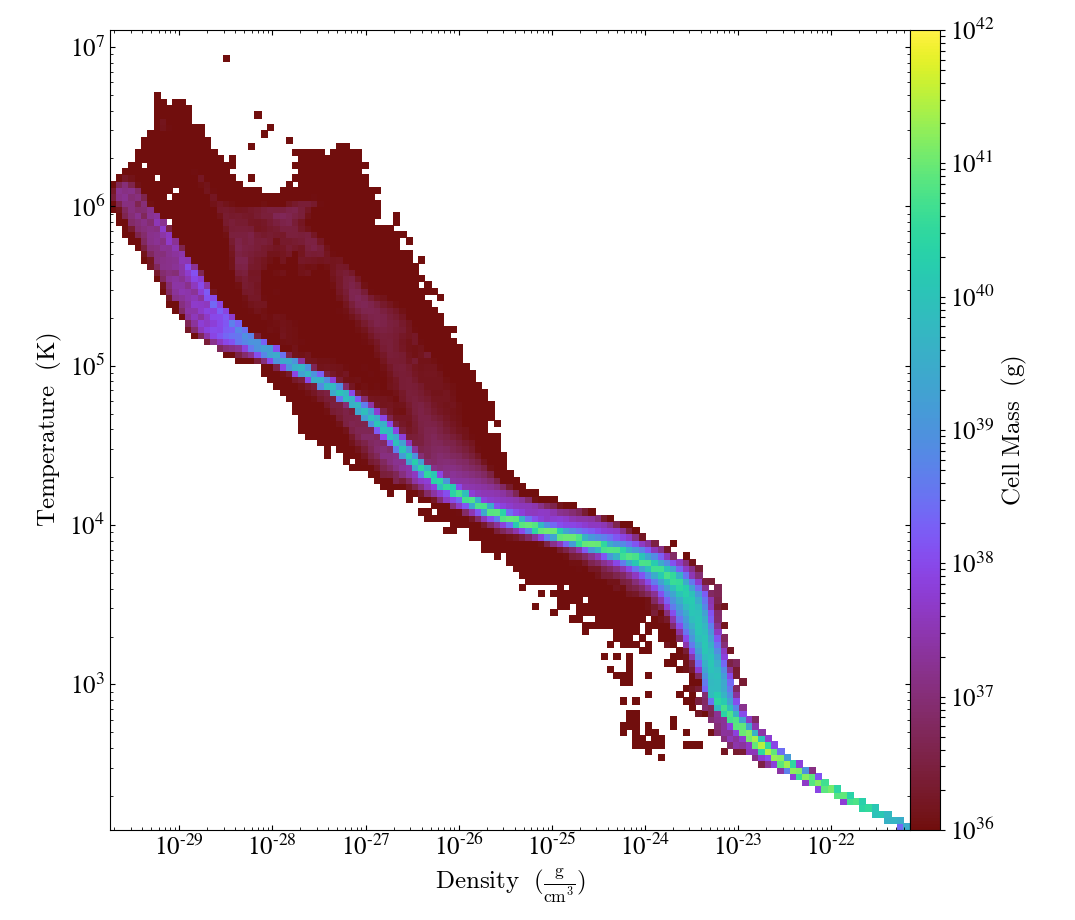

In [42]:
#Okay, now we can take a look at this more finely selected gas:
plot = yt.PhasePlot(diskchoose,"density","temperature",["cell_mass"],weight_field=None)
plot.set_zlim("cell_mass",1e33,1e42)

#Wow, that is showing me bins with LESS than a solar mass, that is way too little gas for me to care about!
#Can I get rid of this small fraction of mass by fiddling with zlim?:

#plot.set_zlim("cell_mass",1e36,1e42)


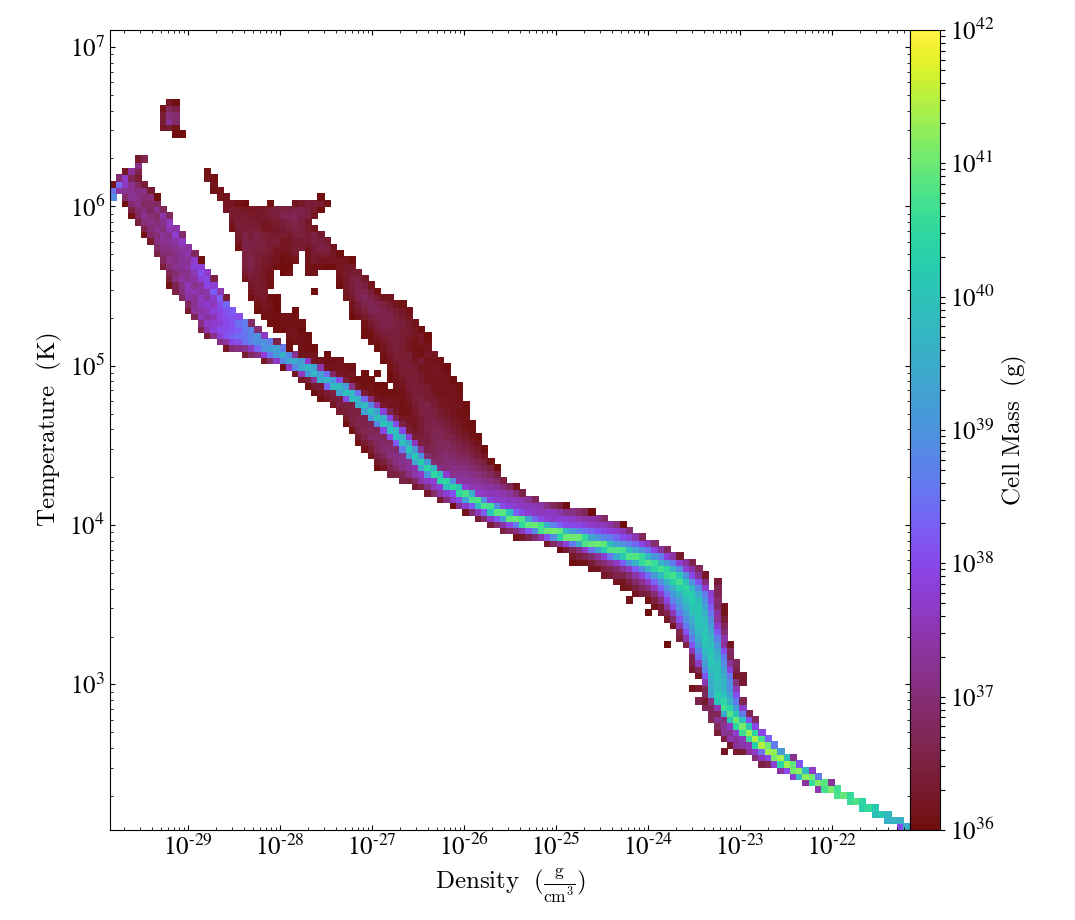

In [43]:
#That did not actually clean up my phaseplot.  
#To do that I have to reach right into the histogram-->use create_profile:

profile = yt.create_profile(disku, ['density','temperature'], 'cell_mass',n_bins=128,weight_field=None)
histogram = profile.field_data['gas','cell_mass']
histogram[histogram < 1e36] = 0 
plot3 = yt.PhasePlot.from_profile(profile)
plot3.set_zlim('cell_mass',1e36,1e42)


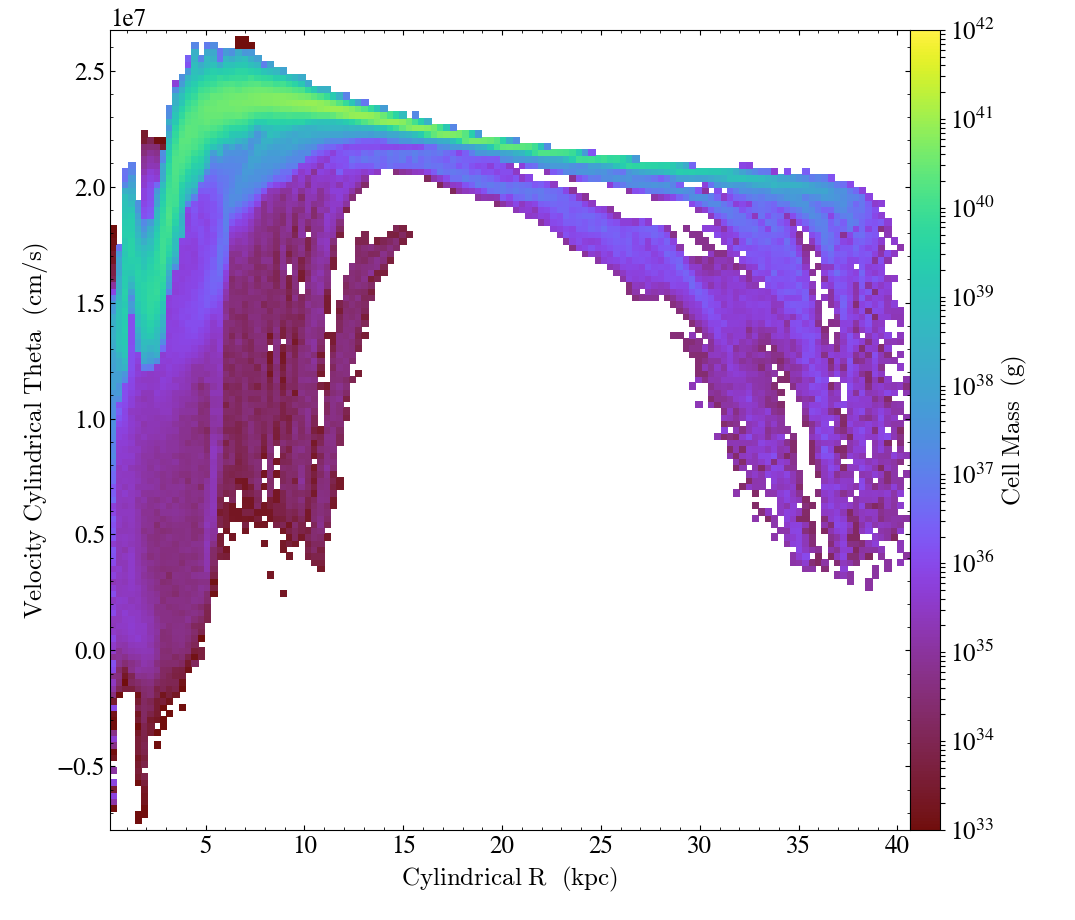

In [44]:
plot = yt.PhasePlot(diskchoose,"cylindrical_r","velocity_cylindrical_theta",["cell_mass"],weight_field=None)
plot.set_zlim("cell_mass",1e33,1e42)
plot.set_unit("cylindrical_r","kpc")
plot.set_log('cylindrical_r',False)
plot.set_log('velocity_cylindrical_theta',False)
#plot.set_zlim("cell_mass",1e36,1e42)


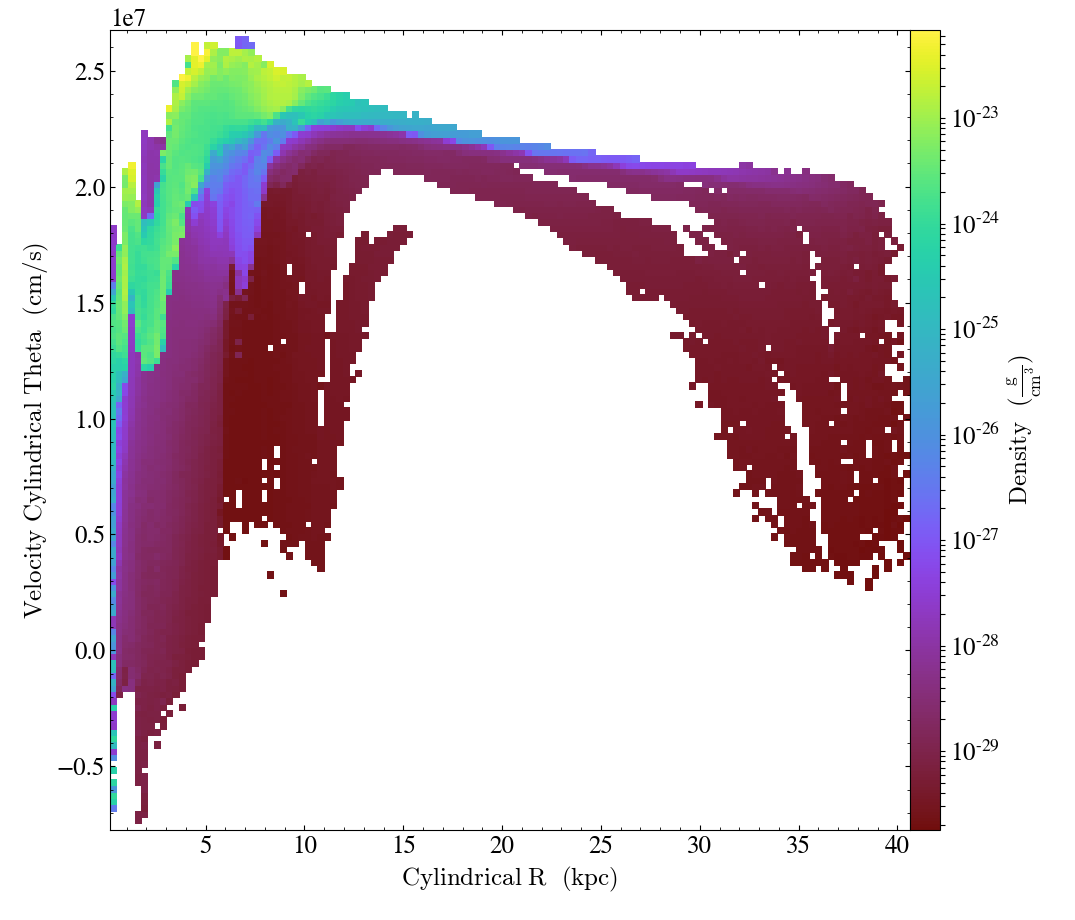

In [45]:
#Let's see why we have such a spread
#Is it that different density gas is moving at different velocities?
plot = yt.PhasePlot(diskchoose,"cylindrical_r","velocity_cylindrical_theta",["density"],weight_field="ones")
#plot.set_zlim("cell_mass",1e33,1e42)
plot.set_unit("cylindrical_r","kpc")
plot.set_log('cylindrical_r',False)
plot.set_log('velocity_cylindrical_theta',False)

/Users/stonnesen/Desktop/yt-conda/src/yt-git/yt/visualization/plot_container.py:117: RuntimeWarning: invalid value encountered in log10
  expA = np.floor(np.log10(vmin))



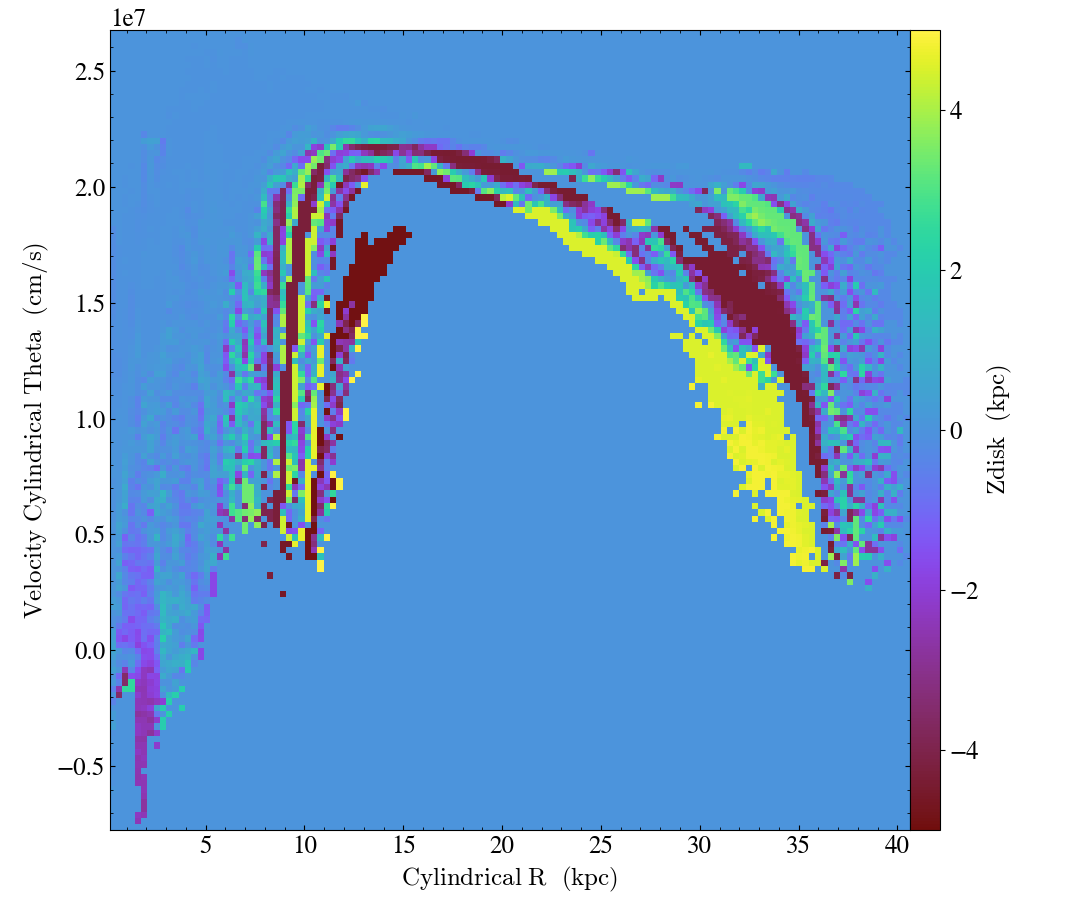

In [46]:
#I feel like this could also be related to the disk height...
plot = yt.PhasePlot(diskchoose,"cylindrical_r","velocity_cylindrical_theta",["zdisk"],weight_field="ones")
plot.set_unit("zdisk","kpc")
plot.set_zlim("zdisk",-5,5)
plot.set_unit("cylindrical_r","kpc")
plot.set_log('cylindrical_r',False)
plot.set_log('velocity_cylindrical_theta',False)
plot.set_log('zdisk',False)



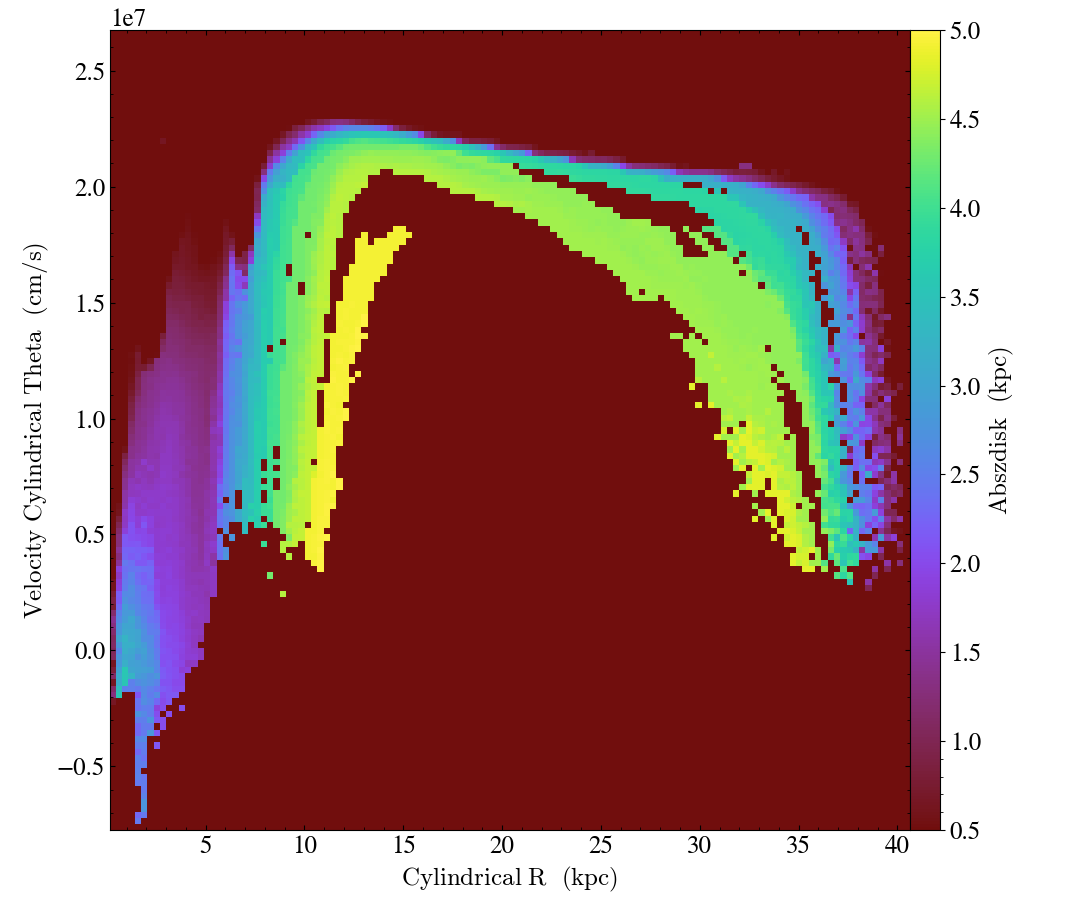

In [53]:
#The values outside are set to 0, so let's see if we can fix that by setting better limits
plot = yt.PhasePlot(diskchoose,"cylindrical_r","velocity_cylindrical_theta",["abszdisk"],weight_field="ones")
plot.set_unit("abszdisk","kpc")
plot.set_zlim("abszdisk",0.5,5)
plot.set_unit("cylindrical_r","kpc")
plot.set_log('cylindrical_r',False)
plot.set_log('velocity_cylindrical_theta',False)
plot.set_log('abszdisk',False)


In [ ]:
#Okay, well we definitely see a relationship, 
#although I am still stumped on how to make the colorbar look the way I want.
#With more time, we could see how cleanly density and abszdisk line up, with maybe a dash of radius thrown in!
#Phaseplots are so versatile!


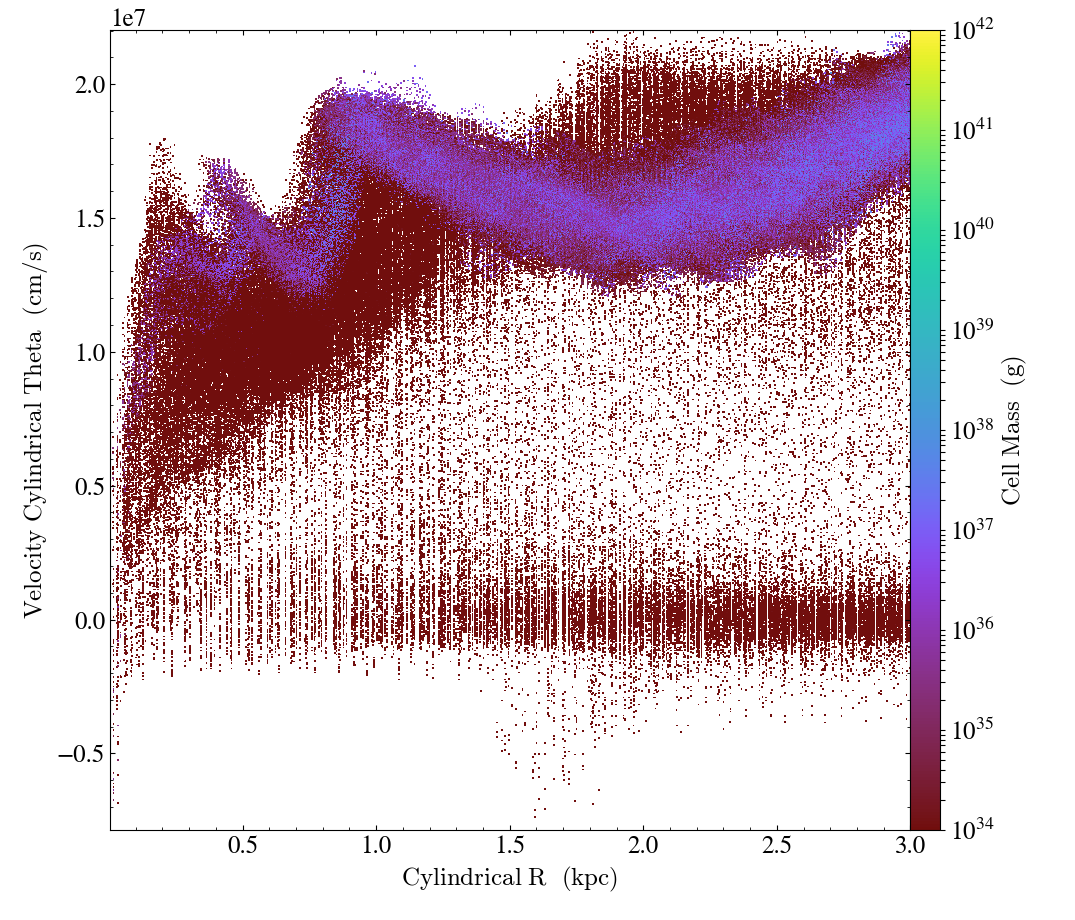

In [57]:
#Finally, the other great thing about using create_profile is n_bins:
disksmall = ds.disk([0.53,0.53,0.53],[0,0,1.0],(3,"kpc"),(5,"kpc"))
profile = yt.create_profile(disksmall,["cylindrical_r","velocity_cylindrical_theta"], 'cell_mass',n_bins=1024,weight_field=None)
histogram = profile.field_data['gas','cell_mass']
histogram[histogram < 1e34] = 0 
plot3 = yt.PhasePlot.from_profile(profile)
plot3.set_zlim('cell_mass',1e34,1e42)
plot3.set_unit("cylindrical_r","kpc")
plot3.set_log('cylindrical_r',False)
plot3.set_log('velocity_cylindrical_theta',False)